In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in the avocado.csv dataset

avocado = pd.read_csv(
    r'C:\Users\Adam\avocado.csv',
    index_col = 0,
)
avocado.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,2015-12-20,0.96,232294.71,96355.05,77086.11,4749.61,54103.94,34992.96,19110.98,0.00,conventional,2015,LasVegas
25,2017-07-09,1.76,4404.15,89.08,521.03,0.00,3794.04,3790.71,3.33,0.00,organic,2017,MiamiFtLauderdale
22,2015-07-26,1.58,628331.04,150230.79,366576.34,32096.30,79427.61,78533.80,893.81,0.00,conventional,2015,SanFrancisco
3,2016-12-04,0.98,728191.35,267955.80,173005.48,50.70,287179.37,89646.48,197097.05,435.84,conventional,2016,MiamiFtLauderdale
26,2017-07-02,1.14,192174.84,102625.76,9979.67,461.09,79108.32,78516.16,525.73,66.43,conventional,2017,StLouis


In [3]:
sns.set()

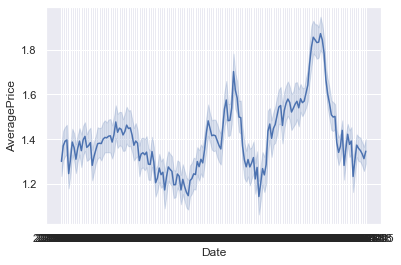

In [4]:
# Create a line plot showing the average
# price of avocado over months

sns.lineplot(
    x='Date',
    y='AveragePrice',
    data=avocado,
)

Text(0.5, 0, 'Mean prices')

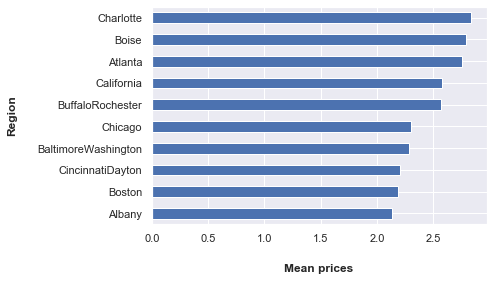

In [5]:
# Create a horizontal bar plot showing
# 10 highest mean prices depending on region

from matplotlib.ticker import StrMethodFormatter

ax = avocado.groupby('region').AveragePrice.max().head(10).sort_values().plot(kind = 'barh')
ax.set_ylabel('Region', labelpad=20, weight='bold', size=12)
ax.set_xlabel('Mean prices', labelpad=20, weight='bold', size=12)

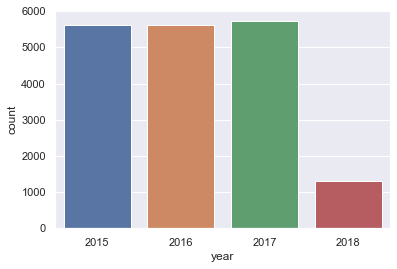

In [6]:
# Create a count plot for the year of the avocado

sns.countplot(
    'year',
    data=avocado,
)

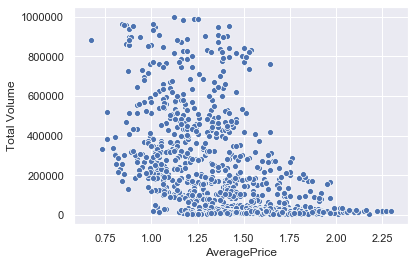

In [7]:
# Create a scatter plot of average price
# vs Total Volume for year 2018, 
# when the Total Volume is lower than 1e6


prep = avocado.loc[((avocado.year == 2018) & (avocado['Total Volume'] < 1000000))]

sns.scatterplot(
    x = 'AveragePrice',
    y = 'Total Volume',
    data=prep,
)

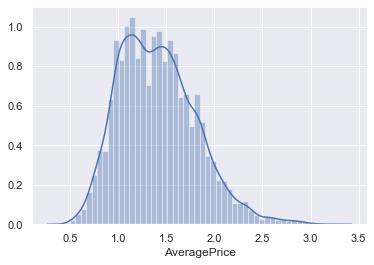

In [8]:
# Show the AveragePrice distribution.

sns.distplot(avocado['AveragePrice'])

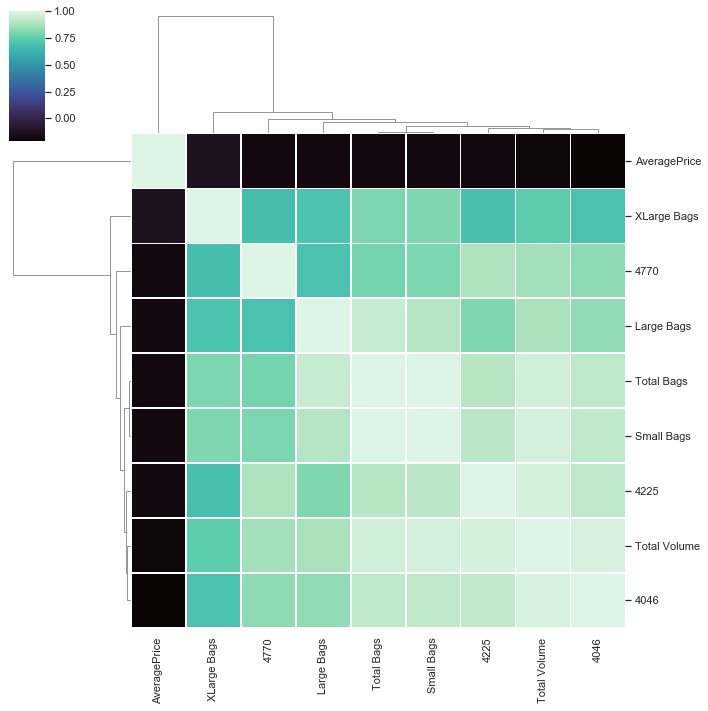

In [9]:
# Create a clustermap of avocado correlations.

cr = ['AveragePrice', 'Total Volume', '4046',
         '4225', '4770', 'Total Bags', 'Small Bags',
         'Large Bags', 'XLarge Bags']
sns.clustermap(
    avocado[cr].corr(),
    cmap="mako",
    linewidths=.75,
)

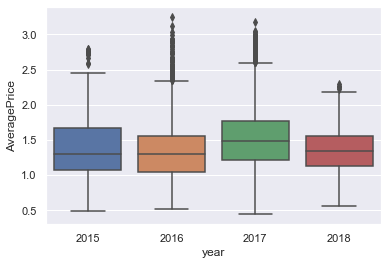

In [10]:
# Show a boxplot of average price per year.

sns.boxplot(
    x='year',
    y='AveragePrice',
    data=avocado,
)